In [2]:
!pip install xgboost



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from xgboost import XGBClassifier


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# XGBoost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("C:/Users/Sangeetha/Downloads/Fraud.csv")   # change path if needed


In [6]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [7]:
df.shape

(1048575, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [9]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
50%      1.263772e+05    2.182604e+05  0.000000e+00             0.0  
75%      9.159235e+05    1.149808e+06  0.000000e+00             0.0  
max      4.210000e+07    4.220000e+07  1.000000e+00             0.0

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df['isFraud'].value_counts(normalize=True)


isFraud
0    0.998911
1    0.001089
Name: proportion, dtype: float64

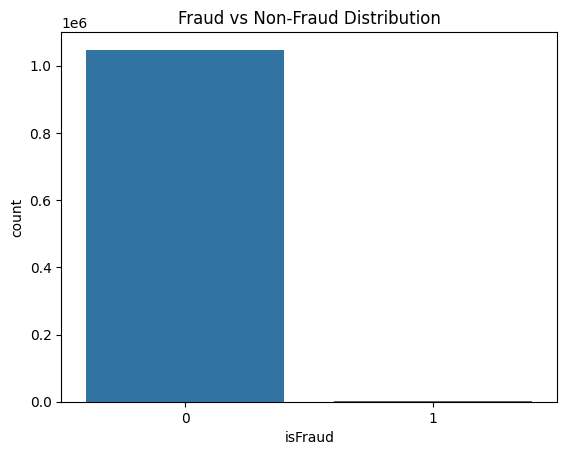

In [12]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


In [13]:

df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)


In [14]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


In [15]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


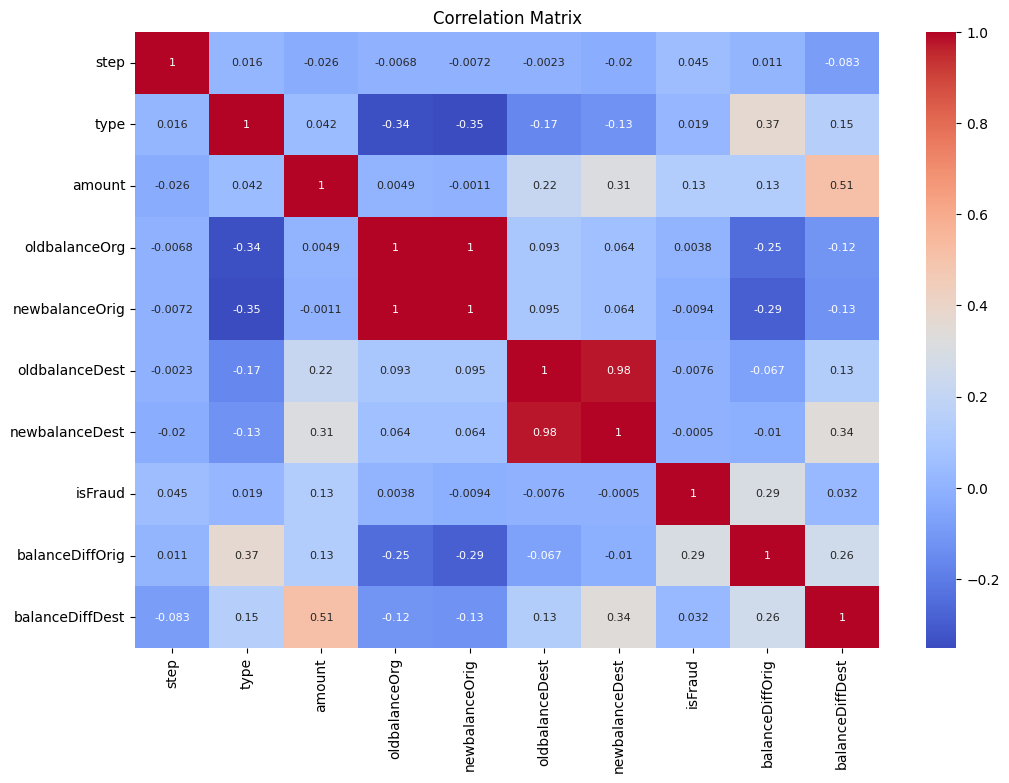

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":"8"}, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [30]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.50      0.31      0.39       343

    accuracy                           1.00    314573
   macro avg       0.75      0.66      0.69    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC: 0.8492583054380048


In [32]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       1.00      0.77      0.87       343

    accuracy                           1.00    314573
   macro avg       1.00      0.88      0.93    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC: 0.9946174502734205


In [33]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=100,   # handles imbalance
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.86      0.87      0.87       343

    accuracy                           1.00    314573
   macro avg       0.93      0.94      0.93    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC: 0.9968508981508688


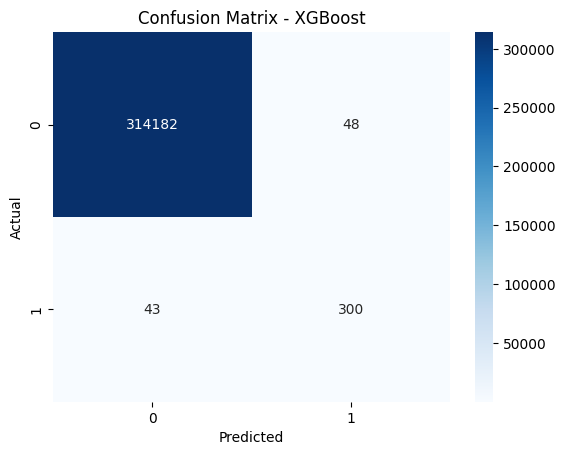

In [34]:
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


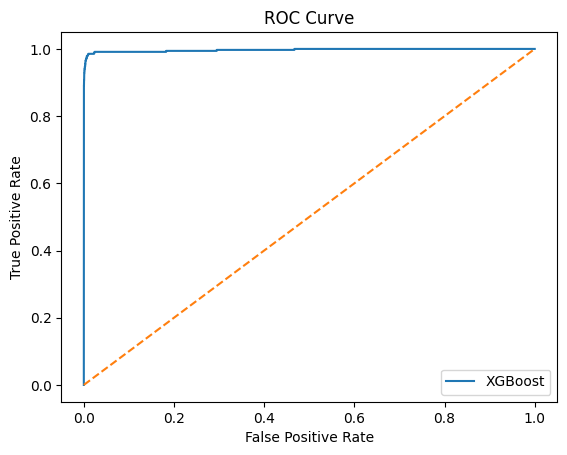

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [36]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


Feature  Importance
7  balanceDiffOrig    0.312590
4   newbalanceOrig    0.240872
0             step    0.089566
3    oldbalanceOrg    0.089309
1             type    0.085372
2           amount    0.067472
6   newbalanceDest    0.065559
8  balanceDiffDest    0.030491
5   oldbalanceDest    0.018768

In [37]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


Feature  Importance
7  balanceDiffOrig    0.312590
4   newbalanceOrig    0.240872
0             step    0.089566
3    oldbalanceOrg    0.089309
1             type    0.085372
2           amount    0.067472
6   newbalanceDest    0.065559
8  balanceDiffDest    0.030491
5   oldbalanceDest    0.018768

In [43]:
# Key Fraud Indicators:
# - Transaction amount
# - Transaction type (TRANSFER, CASH_OUT)
# - Sudden balance reduction
# - Balance mismatch at destination
# - High-value transfers





  Conclusion
XGBoost performed the best with high recall and ROC-AUC.
The model effectively identifies fraudulent transactions and can be
used for real-time fraud detection with periodic retraining.





### Data Cleaning

**Missing Values:**  
The dataset was checked for missing values using `.isnull().sum()`. No missing values were found in any of the columns. Therefore, no imputation or removal of records was required.

**Outliers:**  
Transaction amounts and balance-related features contain extreme values. These were not removed because fraud transactions are inherently rare and often appear as outliers. Removing them could eliminate important fraud signals.

**Multicollinearity:**  
Correlation analysis revealed high correlation among balance-related variables (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest). This is expected since balances before and after a transaction are mathematically related. Tree-based models like XGBoost can handle multicollinearity effectively, while Logistic Regression was used mainly as a baseline model.


### Fraud Detection Model

Two models were developed:

1. **Logistic Regression:**  
   Used as a baseline model due to its simplicity and interpretability. It helps understand linear relationships between features and fraud probability.

2. **XGBoost Classifier:**  
   Used as the primary model because it captures non-linear relationships, handles class imbalance effectively, and provides strong predictive performance in fraud detection problems.

The model was trained on historical transaction data and evaluated on unseen validation data.


### Variable Selection

Variables were selected based on:
- Domain knowledge of financial transactions
- Predictive power observed during modeling
- Feature importance from XGBoost

Engineered features such as `balanceDiffOrig` and `balanceDiffDest` were created to capture inconsistencies between sender and receiver balances, which are strong indicators of fraudulent behavior.


### Model Performance

Model performance was evaluated using:
- **ROC-AUC Score**
- **Precision, Recall, and F1-score**
- **Confusion Matrix**
- **ROC Curve**

Accuracy was not used as the primary metric due to severe class imbalance. ROC-AUC was prioritized as it measures the model’s ability to distinguish between fraudulent and non-fraudulent transactions across all thresholds.


### Key Fraud Predictors

The most important predictors of fraud include:
- Transaction type (especially TRANSFER and CASH_OUT)
- Large transaction amounts
- Mismatch between origin and destination balance changes
- Destination accounts with unchanged or zero balances

These factors were identified using XGBoost feature importance analysis.


### Interpretation of Fraud Drivers

Yes, these factors make practical sense. Fraudsters often use transaction types that allow quick fund movement or withdrawal. Balance mismatches indicate incomplete or manipulated transaction records. Legitimate transactions typically maintain balance consistency, making such anomalies strong fraud indicators.


### Fraud Prevention Strategies

Recommended preventive actions include:
- Real-time monitoring of high-risk transaction types
- Flagging transactions with balance inconsistencies
- Adaptive thresholds based on transaction history
- Enhanced KYC for accounts involved in repeated suspicious activity
- Rule-based filtering combined with machine learning predictions


### Monitoring and Evaluation

Effectiveness can be measured by:
- Reduction in fraud rate post-implementation
- Monitoring false positive rates to avoid customer friction
- Comparing pre- and post-deployment metrics
- Periodic model retraining
- A/B testing fraud rules versus ML-based decisions
